In [2]:
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
import os
from pathlib import Path

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


2024-08-27 17:16:54.081220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


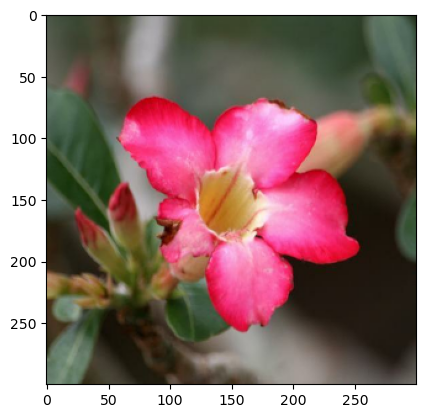

In [4]:
test = tf.keras.utils.image_dataset_from_directory('102_flowers_dataset/train/',image_size=(300, 300),batch_size=16)
train = tf.keras.utils.image_dataset_from_directory('102_flowers_dataset/valid/',image_size=(300, 300),batch_size=16)

for i,j in train.take(1):
    plt.imshow(i[0].numpy().astype('int64'))


In [5]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer((300,300,3)),
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(102, activation="softmax")
    ]
)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 300, 300, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 300, 300, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,654,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 102)            │         1,734 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,535,958 (13.49 MB)

 Trainable params: 3,535,958 (13.49 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
"""
new_model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
"""

'\nnew_model = tf.keras.applications.VGG16(\n    include_top=True,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=None,\n    pooling=None,\n    classes=1000,\n    classifier_activation="softmax",\n)\n'

In [6]:
model.load_weights('cnn.keras')

/home/omnissiah/miniconda3/envs/test_env/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
model.fit(test,epochs=10,batch_size=8)

Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 63s 154ms/step - accuracy: 0.6887 - loss: 1.0330
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 65s 158ms/step - accuracy: 0.6866 - loss: 1.0381
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 65s 158ms/step - accuracy: 0.6919 - loss: 1.0279
Epoch 4/10
 30/410 ━━━━━━━━━━━━━━━━━━━━ 1:00 160ms/step - accuracy: 0.6927 - loss: 1.0903

KeyboardInterrupt: 

In [15]:
model.save('cnn.keras')

In [16]:
model.evaluate(train)

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.4963 - loss: 2.4463


[2.4396884441375732, 0.5110024213790894]